## No segmentation - simple OCR all text in the image and check according to the Ukrainian plate format

In [296]:
# Uploaded images
IMAGES = [
    "AE1455KH_f.jpg",  # 0
    # "BM8780EC.jpg",  # 1
    # "BA5486HE.jpg",  # 2
    # "BE0394EE.jpg",  # 3
    # "AX0787CO.jpg",  # 4
    # "BM7462BI.jpg",  # 5
    # "BA9635HA.jpg",  # 6
    # "BK9358HH.jpg",  # 7
    # "BM0485CM.jpg",  # 8
    # "AB6924KK.jpg",  # 9
    # "KA7777AC.jpg",  # 10
    # "KA3792KK.jpg",  # 11
    # "AA3003OB.jpg",  # 12
    # "AM3808CO.jpg",  # 13
    # "AE6638KK.jpg",  # 14
    # "KA8781IO.jpg",  # 15
    # "AE1455KH.jpg",  # 16
    # "AA6418XA.jpg",  # 17
    # "AA6418XA_2.jpg",  # 18
    # "AA1080BC.jpg", # 19
    "BUBO4KA.jpg",  # 20
    # "AE1455KH_4.jpg",
    # "AI8988IP.jpg",
    # "KE7777HT.jpg",
    # "AA9030PO.jpg",
    # "NOT4YOU.jpg",
    # "AA1488CH.jpg",
    # "AE0205XB.jpg",
    # "AE1455KH_a.jpg",
    # "AE1455KH_0.jpg",
    # "AE1455KH_2.jpg",
    # "AE1455KH_b.jpg",
    # "AE1455KH_c.jpg",
    # "KA7777XK.jpg",
    # "BA2887EP.jpg",
    # "AI3196OE.jpg",
    # "DI5646IA.jpg",
    # "KE3372AI.jpg",
    # "AP3319CH.jpg",
    # "KA5794BT.jpg",
    # "BA9475HA.jpg",
    # "AE3322BX.jpg",
    # "AX7420OB.jpg",
    # "AP9097HT.jpg",
    # "AX8902EI.jpg",
    # "AB7320KO.jpg",
    # "KE1689AE.jpg",
    # "AA1213KI.jpg",
    # "KE6862AE.jpg",
    # "BI9426HP.jpg",
    # "EK7274.jpg",
    # "AX2807OC.jpg",
    # "AE8927TX.jpg",
    # "CE7151EK.jpg",
    # "BI3373EA.jpg",
    # "KA1440EC.jpg",
    # "KA7777CA.jpg",
    # "AB3747BC.jpeg",
    # "AO1467BH.jpeg",
    # "AA8168YA.jpg",
    # "AE1455KH_3.jpg",
    # "KA3713EX.jpg",
    # "KA2014EX.jpg",
    # "AA1870XA.jpg",
    # "UVVI8I.jpg",
    # "AI2866YA.jpg",
    # "KA1088IO.jpg",
    # "AH0576OC.jpg",
    # "KA2803IT.jpg",
    # "PYTHON.jpg",
    # "PYTHON_2.jpg",
    # "AE3591IT.jpg",
    # "A00001A.jpg",
    # "AE7094HC.jpg",
    # "AR024MI.jpg",
    # "HH0001OO.jpg",
    # "KE3198AE.jpeg",
    # "SN66XMZ.jpg",
    # "BT5390BM.jpg",
    # "KA2443II.jpg",
    # "KA7975II.jpg",
    # "X7X.jpg",
    # "DP0000SS_3.jpg",
    # "AA3973ZA.jpg",
    # "KA2891EO.jpg",
    # "KA1730HK.jpg",
    # "AE1455KH_e.jpg",
    # "AE1455KH_d.jpg",
    # "KA1596AO.jpg",
    # "AA1716PP.jpg",
    # "AI7013HK.jpg",
    # "AE3591IT_2.jpg",
    # "AE3591IT_3.jpg",
    # "AX3020KK.jpg",
    # "AM2015HE.jpg",
    "KA6003EK.jpg",
    "AA9086YA.jpg",
    "AI8408OO_2.jpg",
    "AI8408OO.jpg",
    "KA4579OX_2.jpg",
    "KA4579OX.jpg",
    "AA7322XH.jpg",
    # "KX1899AB.jpg",
    # "FART.jpg",
]

In [297]:
# # запускати один раз, потім можна закрити коментами
# !python.exe -m pip install --upgrade pip
# !pip3 install paddlepaddle
# !pip3 install paddleocr

In [298]:
import cv2
import os
import re
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from paddleocr import PaddleOCR

In [299]:
# Initialize PaddleOCR with English language model
ocr = PaddleOCR(
    use_angle_cls=True,
    lang="en",
    use_gpu=True,
    total_process_num=os.cpu_count() * 2 - 1,
    show_log=False,
)

In [300]:
plate_cascade = cv2.CascadeClassifier("../models/haarcascade_ua_license_plate.xml")

In [301]:
MODEL = "../models/model_ua_license_plate.keras"
model = load_model(MODEL, compile=False)

In [302]:
NOT_NUMBER = [
    "UA",
    "JA",
    "11",
    "10",
    "16",
    "RXETD",
    "21",
    "22",
    "I",
    "Q",
    "X",
    "II",
    "AS",
    "F923",
    "SS00",
    "RANGEROVER",
    "RANGE",
    "ROVER",
    "KIA",
    "TOYOTA",
    "SIENN6CE",
    "DA",
    "LA",
    "FIAT",
    "61338",
]

     Функції обробки тексту, що розпізнано 

In [303]:
# позиційна обробка ["1", "0", "7", '8'] <-> ["I", "O", "Z", 'B']
def correction_ua_number(text):
    # if len(text) == 8:
    text_list = list(text)
    # letters_list = text_list[:2] + text_list[-2:]
    # letters_list = [0, 1, 6, 7]
    # print(f"{letters_list = }")
    # numbers_list = text_list[2:6]
    # print(f"{numbers_list = }")

    for i in [0, 1, 6, 7]:
        text_list[i] = (
            text_list[i]
            .replace("1", "I")
            .replace("i", "I")
            .replace("|", "I")
            .replace("0", "O")
            .replace("7", "Z")
            .replace("8", "B")
            .replace("5", "B")
        )

    for i in [2, 3, 4, 5]:
        text_list[i] = (
            text_list[i]
            .replace("I", "1")
            .replace("|", "1")
            .replace("O", "0")
            .replace("J", "3")
            .replace("G", "6")
            .replace("A", "6")
            .replace("Z", "7")
            .replace("B", "8")
            .replace("Y", "9")
            .replace("S", "9")
        )

    text = "".join(text_list)
    return text


# Validate Ukrainian plate format
def validate_ukraine_plate(text_):
    pattern = r"^[A-Z]{2}\d{4}[A-Z]{2}$"
    return bool(re.match(pattern, text_))

In [304]:
# обробка тексту, що розпізнано на номері
def processing_number_text(result):
    text_up = ""

    for line in result:

        for word in line:

            text_pred = word[1][0].strip().replace("\n", "").replace(" ", "")
            if len(text_pred) == 8:
                text_pred = correction_ua_number(text_pred)

            if text_pred in NOT_NUMBER:
                continue

            # для американських номерів (в 2 ряди)
            if re.match(r"^[A-Z0-9]{4}$", text_pred) and text_up == "":
                text_up = text_pred
                print(f"->> {text_up = }")
                text_up_list = list(text_up)
                for i in range(len(text_up_list)):
                    text_up_list[i] = (
                        text_up_list[i]
                        .replace("1", "I")
                        .replace("i", "I")
                        .replace("|", "I")
                        .replace("0", "O")
                        .replace("7", "Z")
                        .replace("8", "B")
                        .replace("5", "B")
                    )
                text_up = "".join(text_up_list)
                print(f"+>> {text_up = }")

            elif re.match(r"^\d{4}$", text_pred) and re.match(r"^[A-Z]{4}$", text_up):
                text_pred = text_up[:2] + text_pred + text_up[2:]
                text_up = ""

            output_text = text_pred
            # print(f">-> {output_text = }")

            if re.match(r"^[A-Z0-9]+$", output_text):
                if validate_ukraine_plate(output_text):
                    print(f"Detected License Plate: \033[33m{output_text}\033[0m")
                else:
                    print(f"-Invalid License Plate: \033[31m{output_text}\033[0m")
                    # print(f">-- {output_text = }")
        # print(f"--> {output_text = }")
    return output_text

In [305]:
# detect_plate
def detect_plate(img, text=""):
    plate_img = img.copy()
    roi = img.copy()
    plate = None  # Initialize plate with a default value
    plate_rect = plate_cascade.detectMultiScale(
        plate_img, scaleFactor=1.6, minNeighbors=8
    )
    for x, y, w, h in plate_rect:
        # roi_ = roi[y : y + h, x : x + w, :]
        plate = roi[y : y + h, x : x + w, :]
        cv2.rectangle(
            plate_img, (x - 15, y), (x + w - 3, y + h - 5), (179, 206, 226), 3
        )
    if text != "" and plate is not None:
        plate_img = cv2.putText(
            plate_img,
            text,
            (x - w // 2, y - h // 2),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            0.5,
            (179, 206, 226),
            1,
            cv2.LINE_AA,
        )

    return plate_img, plate

In [306]:
# Extract license plate text using PaddleOCR
def extract_license_plate_text(image_path):

    # OCR debug - сірим кольором
    print("\033[90m", end="")
    result = ocr.ocr(image_path)
    print("\033[0m", end="")

    return processing_number_text(result)

In [307]:
# Функції model_keras

def display(img_, title=""):
    """
    функція виводу зображень з заголовком
    """
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()


def detect_plate(img, text=""):
    """
    Функція призначена для виявлення та обробки номерних знаків на зображенні.

    Параметри:
    img (numpy.array): Зображення, на якому потрібно виявити та обробити номерні знаки.
    text (str, optional): Текст, який можна додати на зображення навколо номерного знаку.

    Повертає:
    numpy.array: Зображення з виділеними номерними знаками та, за бажанням, доданим текстом.
    numpy.array or None: Зображення області номерного знаку для подальшої обробки або None, якщо номерний знак не був виявлений.
    """
    plate_img = img.copy()  # перша копія зображення
    reg_of_intr = img.copy()  # друга копія зображення

    # виявляє номерні знаки та повертає координати та розміри виявлених контурів номерних знаків
    plate_rect = plate_cascade.detectMultiScale(
        plate_img, scaleFactor=1.4, minNeighbors=7
    )

    # print(f"{plate_rect = }")
    # print(f"{len(plate_rect) = }")
    # if len(plate_rect) <= 0:
    #     print("here!")
    plate_rect = plate_rect[[len(plate_rect) - 1]]
    # print(f"{plate_rect = }")
    # print(f"{len(plate_rect) = }")

    # виділення частини номерного знака для розпізнавання
    for x, y, w, h in plate_rect:
        plate = reg_of_intr[y : y + h, x : x + w, :]
        # print(f"{plate = }")
        # малювання прямокутника по межі номера
        cv2.rectangle(plate_img, (x + 2, y), (x + w - 3, y + h - 5), (51, 181, 155), 3)

    # Додавання тексту
    if text != "":
        plate_img = cv2.putText(
            plate_img,
            text,
            (x - w // 2, y - h // 2),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            0.5,
            (51, 181, 155),
            1,
            cv2.LINE_AA,
        )

    # Повертаємо оброблене зображення з виділеними номерними знаками та область номерного знаку
    return plate_img, plate


def find_contours(dimensions, img, echo=True):
    """
    Функція призначена для знаходження контурів символів на зображенні номерного знака.

    Параметри:
        dimensions (list): Список, що містить набір розмірів контурів символів:
                           lower_width, upper_width, lower_height та upper_height.
        img (numpy.ndarray): Вхідне зображення, на якому потрібно знайти контури символів.

    Повертає:
        numpy.ndarray: Масив, що містить зображення контурів символів, відсортованих за координатою x.
    """

    # Знайти всі контури на зображенні
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Отримати потенційні розміри
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread("../../tmp/contour.jpg")

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs:
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # checking the dimensions of the contour to filter out the characters by contour's size
        if (
            intWidth > lower_width
            and intWidth < upper_width
            and intHeight > lower_height
            and intHeight < upper_height
        ):
            x_cntr_list.append(
                intX
            )  # stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44, 24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY : intY + intHeight, intX : intX + intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(
                ii, (intX, intY), (intWidth + intX, intY + intHeight), (76, 202, 102), 2
            )
            if echo:
                plt.imshow(ii, cmap="gray")

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(
                char_copy
            )  # List that stores the character's binary image (unsorted)

    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
    # if echo:
    #     plt.show()

    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        # stores character images according to their index
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)

    return img_res


def segment_characters(image, echo=True):
    """
    Знаходить символи на зображенні номерного знака.

    Параметри:
     - image: Зображення номерного знака, з якого будуть вилучені символи.

    Повертає:
     - char_list: Список контурів символів, знайдених на зображенні.
    """
    # Попередньо оброблюємо зображення номерного знака
    img_lp = cv2.resize(image, (333, 75))  # Resize the image to a fixed size
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply binary thresholding
    _, img_binary_lp = cv2.threshold(
        img_gray_lp, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # Apply erosion to remove noise
    img_binary_lp = cv2.erode(img_binary_lp, (3, 3))
    # Apply dilation to restore original size
    img_binary_lp = cv2.dilate(img_binary_lp, (3, 3))

    LP_WIDTH = img_binary_lp.shape[0]  # Get the width of the license plate
    LP_HEIGHT = img_binary_lp.shape[1]  # Get the height of the license plate

    # Робимо межі білими
    img_binary_lp[0:3, :] = 255  # Minimum character height
    img_binary_lp[:, 0:3] = 255  # Maximum character height
    img_binary_lp[72:75, :] = 255  # Minimum character width
    img_binary_lp[:, 330:333] = 255  # Maximum character width

    # Приблизні розміри контурів символів обрізаного номерного знака
    dimensions = [LP_WIDTH / 6, LP_WIDTH / 2, LP_HEIGHT / 10, 2 * LP_HEIGHT / 3]

    if echo:
        plt.imshow(img_binary_lp, cmap="gray")  # Display the binary image
    if echo:
        plt.show()

    # Save the binary image to a file
    cv2.imwrite("../../tmp/contour.jpg", img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(
        dimensions, img_binary_lp, echo=False
    )  # Find character contours

    return char_list  # Return the list of character contours


def fix_dimension(img):
    """
    Функція для вирівнювання розмірів зображення до розмірів (28, 28, 3).

    Параметри:
    img (numpy.ndarray): Вхідне зображення з розмірами (n, m), де n та m - цілі числа.

    Повертає:
    numpy.ndarray: Зображення з розмірами (28, 28, 3), де 3 - кількість каналів (RGB).
    """
    new_img = np.zeros((28, 28, 3))
    for i in range(3):
        new_img[:, :, i] = img
    return new_img


def show_results(char):
    """
    Функція для показу результатів розпізнавання символів на номерному знаку.

    Параметри:
    char (list): Список зображень символів номерного знаку.

    Повертає:
    str: Рядок, що містить розпізнану номерну знаку, складену з окремих символів.
    """
    dic = {}
    characters = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for i, c in enumerate(characters):
        dic[i] = c
    # print(dic)

    output = []
    for i, ch in enumerate(char):  # ітеруємося по символах
        img_ = cv2.resize(ch, (28, 28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1, 28, 28, 3)  # підготовка зображення для моделі
        # отримуємо ймовірності для кожного класу
        y_proba = model.predict(img, verbose=0)[0]
        y_ = np.argmax(y_proba)  # вибираємо клас з найвищою ймовірністю
        character = dic[y_]  # отримуємо символ, відповідний прогнозованому класу
        output.append(character)  # зберігаємо результат у списку

    plate_number = "".join(output)  # об'єднуємо всі символи у рядок

    if len(plate_number) == 8:
        plate_number = correction_ua_number(plate_number)

    return plate_number

In [308]:
def display_result_both(
    img_,
    title="",
    recognized_text_ocr="",
    recognized_text="",
    font_scale=2,
    font_thickness=3,
):

    BOX_COLOR = (255, 255, 255)
    # Copy the image to avoid modifying the original one
    img = img_.copy()
    # Font settings for OpenCV
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Position for the ocr-text near the top of the image
    text_position = (50, 100)  # Starting position for the text

    # Calculate the size of the text box
    (text_width, text_height), baseline = cv2.getTextSize(
        recognized_text_ocr, font, font_scale, font_thickness
    )

    # Calculate the coordinates for the white rectangle
    box_coords = (
        (text_position[0] - 10, text_position[1] + baseline - text_height - 30),
        (text_position[0] + text_width + 10, text_position[1] + baseline - 10),
    )

    # Draw the white rectangle
    cv2.rectangle(img, box_coords[0], box_coords[1], BOX_COLOR, cv2.FILLED)

    # Add recognized text to the image
    img_ocr = cv2.putText(
        img,
        recognized_text_ocr,
        text_position,
        font,
        font_scale,
        (255, 0, 0),
        font_thickness,
        cv2.LINE_AA,
    )

    # Calculate the position for the text near the bottom of the image
    img_height, img_width = img.shape[:2]
    text_position = (50, img_height - 50)

    # Calculate the size of the text box
    (text_width, text_height), baseline = cv2.getTextSize(
        recognized_text, font, font_scale, font_thickness
    )

    # Calculate the coordinates for the white rectangle
    box_coords = (
        (text_position[0] - 10, text_position[1] + baseline - text_height - 30),
        (text_position[0] + text_width + 10, text_position[1] + baseline - 10),
    )

    # Draw the white rectangle
    cv2.rectangle(img, box_coords[0], box_coords[1], BOX_COLOR, cv2.FILLED)

    # Add recognized text to the image
    img = cv2.putText(
        img_ocr,
        recognized_text,
        text_position,
        font,
        font_scale,
        (0, 150, 0),
        font_thickness,
        cv2.LINE_AA,
    )

    display(img, title=title)


 ================================================================================  0 
      Processing image: AE1455KH
Detected License Plate: AE1455KH
Model Detected L.Plate:	AE1455KH 


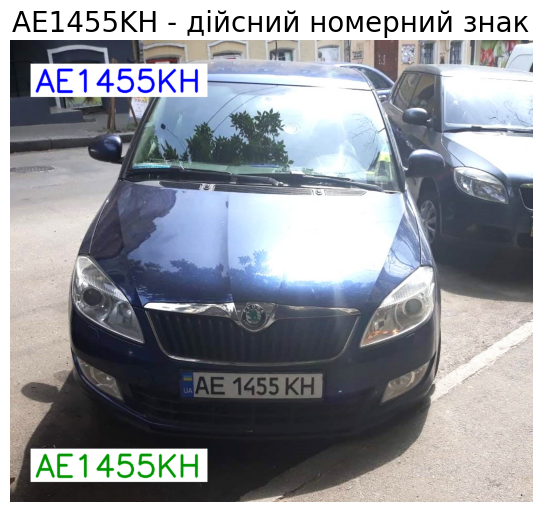


 ================================================================================  1 
      Processing image: BUBO4KA
-Invalid License Plate: 5Y604KA
Model Detected L.Plate:	5Y50MKA 
	=== Difference detected ===


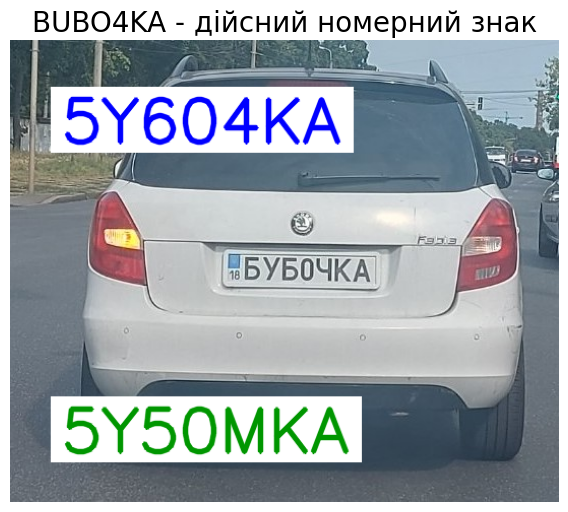


 ================================================================================  2 
      Processing image: KA6003EK
->> text_up = 'KAEK'
+>> text_up = 'KAEK'
-Invalid License Plate: KAEK
Detected License Plate: KA6003EK
Model Detected L.Plate:	N/A 
	=== Difference detected ===


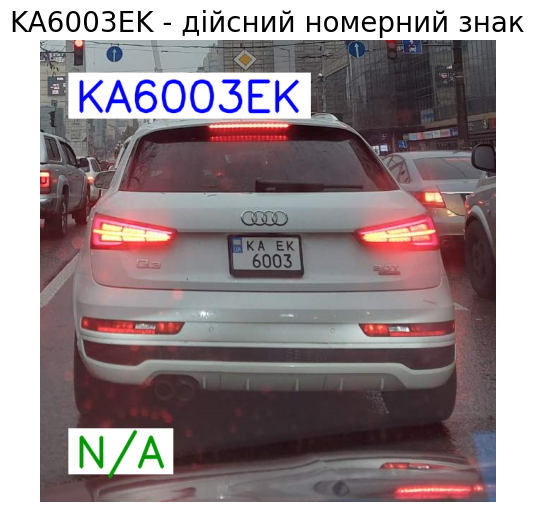


 ================================================================================  3 
      Processing image: AA9086YA
->> text_up = 'AAYA'
+>> text_up = 'AAYA'
-Invalid License Plate: AAYA
Detected License Plate: AA9086YA
Model Detected L.Plate:	N/A 
	=== Difference detected ===


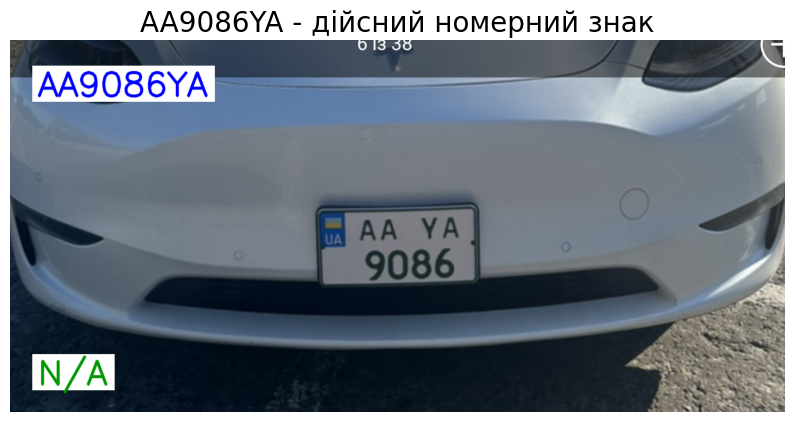


 ================================================================================  4 
      Processing image: AI8408OO
->> text_up = 'AI0O'
+>> text_up = 'AIOO'
-Invalid License Plate: AI0O
Detected License Plate: AI8408OO
Model Detected L.Plate:	N/A 
	=== Difference detected ===


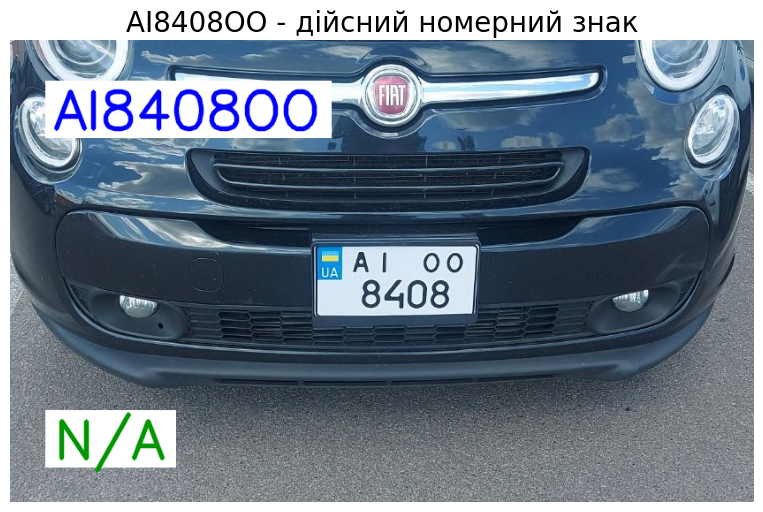


 ================================================================================  5 
      Processing image: AI8408OO
->> text_up = 'AI0O'
+>> text_up = 'AIOO'
-Invalid License Plate: AI0O
Detected License Plate: AI8408OO
Model Detected L.Plate:	N/A 
	=== Difference detected ===


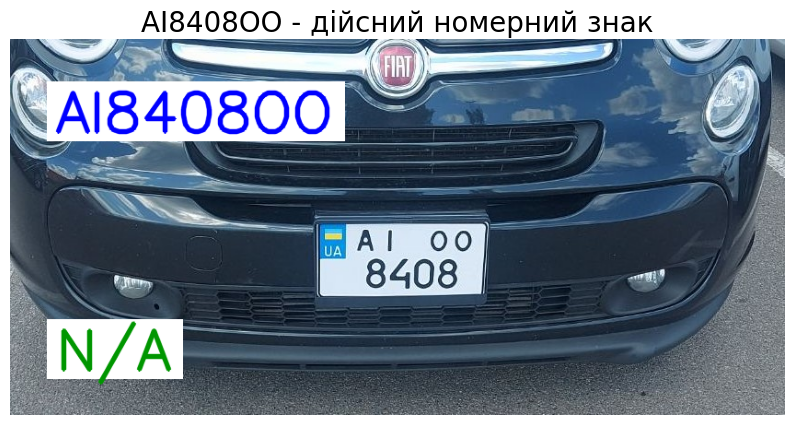


 ================================================================================  6 
      Processing image: KA4579OX
-Invalid License Plate: KA
-Invalid License Plate: OX
->> text_up = '4579'
+>> text_up = '4BZ9'
-Invalid License Plate: 4579
Model Detected L.Plate:	N/A 
	=== Difference detected ===


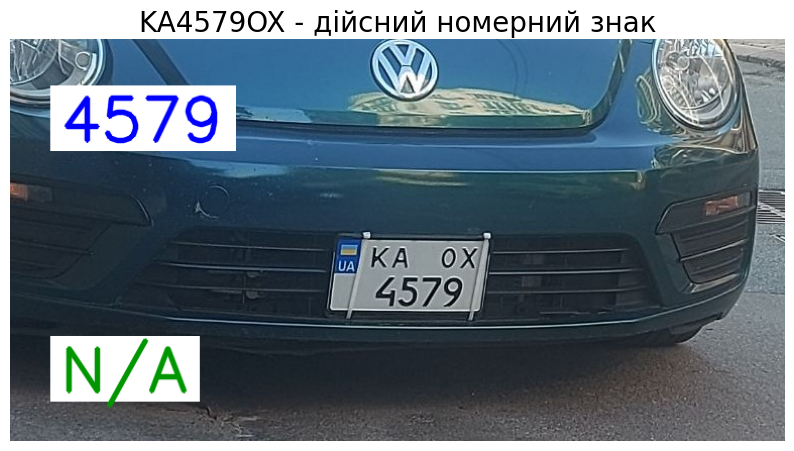


 ================================================================================  7 
      Processing image: KA4579OX
->> text_up = 'KAOX'
+>> text_up = 'KAOX'
-Invalid License Plate: KAOX
Detected License Plate: KA4579OX
Model Detected L.Plate:	N/A 
	=== Difference detected ===


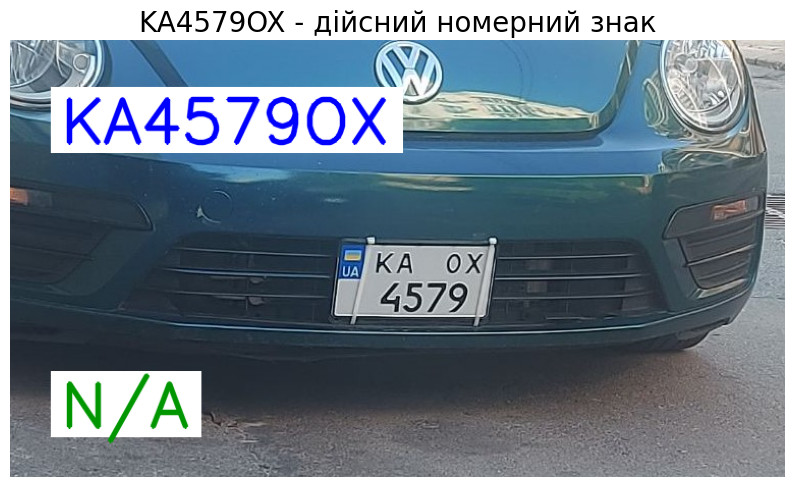


 ================================================================================  8 
      Processing image: AA7322XH
->> text_up = 'AAXH'
+>> text_up = 'AAXH'
-Invalid License Plate: AAXH
Detected License Plate: AA7311XH
Model Detected L.Plate:	N/A 
	=== Difference detected ===


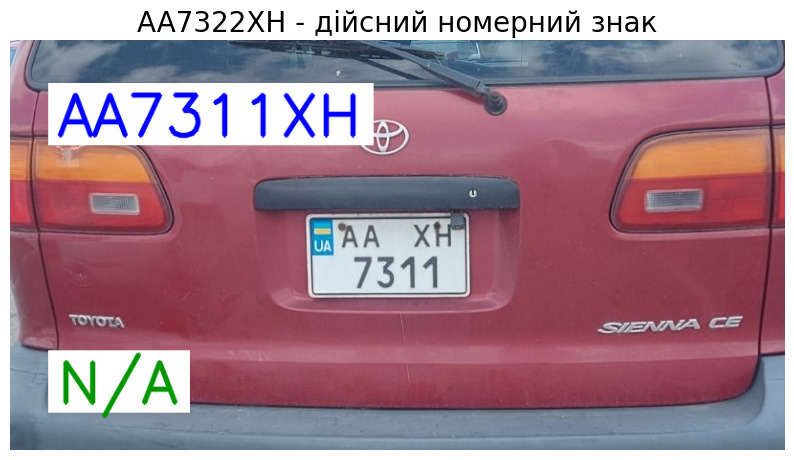

In [309]:
# Process each image and extract license plate text
num_photo = 0
for image in IMAGES:

    clear_number = image.split(".")[0].split("_")[0]
    image_path = cv2.imread("../images/" + image)

    # Check if the image is loaded correctly
    if image_path is None:
        print(
            f"\033[31mError: \033[0mFile \033[37m {image} \033[0m could not be loaded"
        )
        break

    print("\n", 80 * "=", "\033[90m", num_photo, "\033[0m")
    print(f"      Processing image: \033[33m{clear_number}\033[0m")
    num_photo += 1

    plate_number_ocr = extract_license_plate_text(image_path) # ocr

    try:
        output_img, plate = detect_plate(image_path) # DS
        plate_number = show_results(segment_characters(plate, echo=False))
    except:
        plate_number = "N/A"
    print(f"Model Detected L.Plate:\033[33m\t{plate_number} \033[0m")

    if plate_number != plate_number_ocr:
        print("\033[31m\t=== Difference detected ===\033[0m")

    display_result_both(
        image_path,
        title=clear_number + " - дійсний номерний знак",
        recognized_text_ocr=plate_number_ocr,
        recognized_text=plate_number,
    )